# Import Libraries

In [112]:
import torch, torchvision
from torch import nn
from torch import optim
from torchvision.transforms import ToTensor
import torch.nn.functional as F
import matplotlib.pyplot as plt

import copy

from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import random 


BATCH_SIZE = 4

# Getting Data

In [40]:

transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()
])

train_data = torchvision.datasets.MNIST('mnist_data', train = True, download = True, transform = transform)

test_data = torchvision.datasets.MNIST('mnist_data', train = False, download = True, transform = transform)

train_dl = torch.utils.data.DataLoader(train_data, batch_size = BATCH_SIZE)
test_dl = torch.utils.data.DataLoader(test_data, batch_size = BATCH_SIZE)



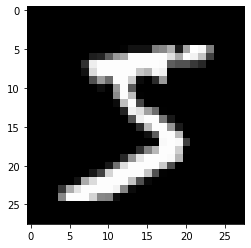

In [41]:
plt.imshow(train_data[0][0][0], cmap = "gray")

# Create The Model

In [42]:
def create_lenet():
    model = nn.Sequential(
        
    nn.Conv2d(1, 6, 5, padding = 2),
    nn.ReLU(),
    nn.AvgPool2d(2, stride = 2),
    
    nn.Conv2d(6, 16, 5, padding = 0),
    nn.ReLU(),
    nn.AvgPool2d(2, stride = 2), 
    
    nn.Flatten(),
    nn.Linear(400, 120),
    nn.ReLU(),
    nn.Linear(120, 84),
    nn.ReLU(),
    nn.Linear(84, 10)
)
    return model

# Validate The Model

In [43]:
def validate(model, data):
    total = 0
    correct = 0
    for i, (images, labels) in enumerate(data):
        x = model(images)
        value, pred = torch.max(x, 1)
        total += x.size(0)
        correct += torch.sum(pred == labels)
    
    return correct*100./total

# Training Function

In [62]:
def train(lr, epochs = 3, device = "cpu"):
    accuracies = []
    cnn = create_lenet().to(device)
    cec = nn.CrossEntropyLoss()
    optimizer = optim.Adam(cnn.parameters(), lr = lr)
    max_accuracy = 0
    
    for epoch in range(epochs):
        for i, (images, labels) in enumerate(train_dl):
            optimizer.zero_grad()
            pred = cnn(images)
            loss = cec(pred, labels)
            loss.backward()
            optimizer.step()
        accuracy = float(validate(cnn, test_dl))
        accuracies.append(accuracy)
        if accuracy > max_accuracy:
            best_model = copy.deepcopy(cnn)
            max_accuracy = accuracy 
            print("Saving Best Model With Accuracy: ", accuracy)
        print("Epoch: ", epoch+1, "Accuracy: ", accuracy, "%")
    #plt.plot(accuracies)
    return best_model, accuracies, lr

# Training The Model: Good Learning Rates

In [66]:
lenet1 = train(0.01, 10)
lenet2 = train(0.001, 10)
lenet3 = train(0.0001, 10)
lenet4 = train(0.00001, 10)



Saving Best Model With Accuracy:  91.41999816894531
Epoch:  1 Accuracy:  91.41999816894531 %
Saving Best Model With Accuracy:  91.9800033569336
Epoch:  2 Accuracy:  91.9800033569336 %
Saving Best Model With Accuracy:  92.68000030517578
Epoch:  3 Accuracy:  92.68000030517578 %
Saving Best Model With Accuracy:  93.08999633789062
Epoch:  4 Accuracy:  93.08999633789062 %
Epoch:  5 Accuracy:  92.48999786376953 %
Epoch:  6 Accuracy:  91.37999725341797 %
Epoch:  7 Accuracy:  91.33000183105469 %
Epoch:  8 Accuracy:  91.44999694824219 %
Epoch:  9 Accuracy:  90.66999816894531 %
Epoch:  10 Accuracy:  92.77999877929688 %
Saving Best Model With Accuracy:  97.19000244140625
Epoch:  1 Accuracy:  97.19000244140625 %
Saving Best Model With Accuracy:  97.86000061035156
Epoch:  2 Accuracy:  97.86000061035156 %
Saving Best Model With Accuracy:  98.22000122070312
Epoch:  3 Accuracy:  98.22000122070312 %
Saving Best Model With Accuracy:  98.47000122070312
Epoch:  4 Accuracy:  98.47000122070312 %
Saving Best

# Bad Learning Rates

In [70]:
lenet5 = train(.99, 10)
lenet6 = train(.5, 10)
lenet7 = train(.1, 10)

Saving Best Model With Accuracy:  9.579999923706055
Epoch:  1 Accuracy:  9.579999923706055 %
Epoch:  2 Accuracy:  9.579999923706055 %
Epoch:  3 Accuracy:  9.579999923706055 %
Epoch:  4 Accuracy:  9.579999923706055 %
Epoch:  5 Accuracy:  9.579999923706055 %
Epoch:  6 Accuracy:  9.579999923706055 %
Epoch:  7 Accuracy:  9.579999923706055 %
Epoch:  8 Accuracy:  9.579999923706055 %
Epoch:  9 Accuracy:  9.579999923706055 %
Epoch:  10 Accuracy:  9.579999923706055 %
Saving Best Model With Accuracy:  9.739999771118164
Epoch:  1 Accuracy:  9.739999771118164 %
Epoch:  2 Accuracy:  9.739999771118164 %
Epoch:  3 Accuracy:  9.739999771118164 %
Epoch:  4 Accuracy:  9.739999771118164 %
Epoch:  5 Accuracy:  9.739999771118164 %
Epoch:  6 Accuracy:  9.739999771118164 %
Epoch:  7 Accuracy:  9.739999771118164 %
Epoch:  8 Accuracy:  9.739999771118164 %
Epoch:  9 Accuracy:  9.739999771118164 %
Epoch:  10 Accuracy:  9.739999771118164 %
Saving Best Model With Accuracy:  9.819999694824219
Epoch:  1 Accuracy:  9

In [173]:
lenet8 = train(.05, 10)

Saving Best Model With Accuracy:  9.819999694824219
Epoch:  1 Accuracy:  9.819999694824219 %
Epoch:  2 Accuracy:  9.819999694824219 %
Epoch:  3 Accuracy:  9.819999694824219 %
Epoch:  4 Accuracy:  9.819999694824219 %
Epoch:  5 Accuracy:  9.819999694824219 %
Epoch:  6 Accuracy:  9.819999694824219 %
Epoch:  7 Accuracy:  9.819999694824219 %
Epoch:  8 Accuracy:  9.819999694824219 %
Epoch:  9 Accuracy:  9.819999694824219 %
Epoch:  10 Accuracy:  9.819999694824219 %


In [103]:
lenet9 = train(0.012, 10)

Saving Best Model With Accuracy:  93.12000274658203
Epoch:  1 Accuracy:  93.12000274658203 %
Epoch:  2 Accuracy:  92.87999725341797 %
Epoch:  3 Accuracy:  89.8499984741211 %
Epoch:  4 Accuracy:  92.9800033569336 %
Saving Best Model With Accuracy:  94.12000274658203
Epoch:  5 Accuracy:  94.12000274658203 %
Saving Best Model With Accuracy:  95.25
Epoch:  6 Accuracy:  95.25 %
Epoch:  7 Accuracy:  92.4000015258789 %
Epoch:  8 Accuracy:  90.1500015258789 %
Epoch:  9 Accuracy:  94.56999969482422 %
Epoch:  10 Accuracy:  92.83999633789062 %


In [69]:
print("Highest Accuracy for Lenet1: ", max(lenet1[1]), " with learning rate: ", lenet1[2])
print("Highest Accuracy for Lenet2: ", max(lenet2[1]), " with learning rate: ", lenet2[2])
print("Highest Accuracy for Lenet3: ", max(lenet3[1]), " with learning rate: ", lenet3[2])
print("Highest Accuracy for Lenet4: ", max(lenet4[1]), " with learning rate: ", lenet4[2])

Highest Accuracy for Lenet1:  93.08999633789062  with learning rate:  0.01
Highest Accuracy for Lenet2:  98.94999694824219  with learning rate:  0.001
Highest Accuracy for Lenet3:  98.56999969482422  with learning rate:  0.0001
Highest Accuracy for Lenet4:  94.04000091552734  with learning rate:  1e-05


<function matplotlib.pyplot.show(close=None, block=None)>

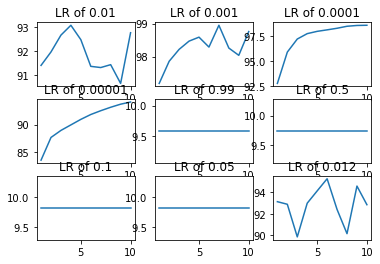

In [109]:
x = [1,2,3,4,5,6,7,8,9,10]

figure, axis = plt.subplots(3,3)
axis[0,0].plot(x, lenet1[1])
axis[0,0].set_title("LR of 0.01")

axis[0,1].plot(x, lenet2[1])
axis[0,1].set_title("LR of 0.001")

axis[0,2].plot(x, lenet3[1])
axis[0,2].set_title("LR of 0.0001")

axis[1,0].plot(x, lenet4[1])
axis[1,0].set_title("LR of 0.00001")

axis[1,1].plot(x, lenet5[1])
axis[1,1].set_title("LR of 0.99")

axis[1,2].plot(x, lenet6[1])
axis[1,2].set_title("LR of 0.5")

axis[2,0].plot(x, lenet7[1])
axis[2,0].set_title("LR of 0.1")

axis[2,1].plot(x, lenet8[1])
axis[2,1].set_title("LR of 0.05")

axis[2,2].plot(x, lenet9[1])
axis[2,2].set_title("LR of 0.012")

plt.show

In [105]:
def predict_dl(model, data):
    y_pred = []
    y_true = []
    for i, (images, labels) in enumerate(data):
        x = model(images)
        value, pred = torch.max(x, 1)
        pred = pred.data.cpu()
        y_pred.extend(list(pred.numpy()))
        y_true.extend(list(labels.numpy()))
    return np.array(y_pred), np.array(y_true)

In [107]:
y_pred, y_true = predict_dl(lenet2[0], test_dl)

In [108]:
pd.DataFrame(confusion_matrix(y_true, y_pred, labels = np.arange(0, 10)))

,0,1,2,3,4,5,6,7,8,9
0,977,0,0,0,0,1,1,1,0,0
1,0,1128,2,3,0,1,0,1,0,0
2,0,1,1029,0,1,0,0,1,0,0
3,0,0,6,1001,0,2,0,0,1,0
4,0,0,3,0,969,0,4,0,0,6
5,2,0,0,3,0,886,1,0,0,0
6,4,4,2,0,0,4,944,0,0,0
7,0,3,12,1,2,0,0,1006,3,1
8,2,0,1,1,0,1,0,1,968,0
9,1,1,1,1,6,3,1,3,5,987


In [121]:
K = 100


In [192]:
def clientUpdate(k, w):
    lr = 0.001
    epochs = 5
    B = BATCH_SIZE
    Beta = random.sample(set(k), B)
    for x in range(epochs):
        for y in Beta:
            w = w-(lr*np.gradient(Beta))
    return w
        

In [193]:
def serverExecution(clients):
    num_clients = len(clients)
    w = random.random()
    C = round(num_clients/100)
    lr = 0.001
    z = 10
    m = 0
    S = []
    for i in range(z):
        m = round(max(C,1))
        S = (random.sample(clients, m))
        for n in S:
            w = clientUpdate(n, w)
            print(w)
    

        
        

In [194]:
def client():
    model = lenet2[0]
    return model
        

In [195]:
client1 = client()
client2 = client()
client3 = client()
client4 = client()
client5 = client()
client6 = client()
client7 = client()
client8 = client()
client9 = client()
client10 = client()
client11 = client()
clientList = [client1,client2,client3, client4, client5, client6, client7, client8, client9, client10]

In [196]:
serverExecution(clientList)

C:\Users\Owner\AppData\Local\Temp/ipykernel_14272/224386280.py:5: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  Beta = random.sample(set(k), B)


TypeError: unsupported operand type(s) for -: 'ReLU' and 'AvgPool2d'